In [2]:
from Weidman_Figures import *

# HW 1

## Q1

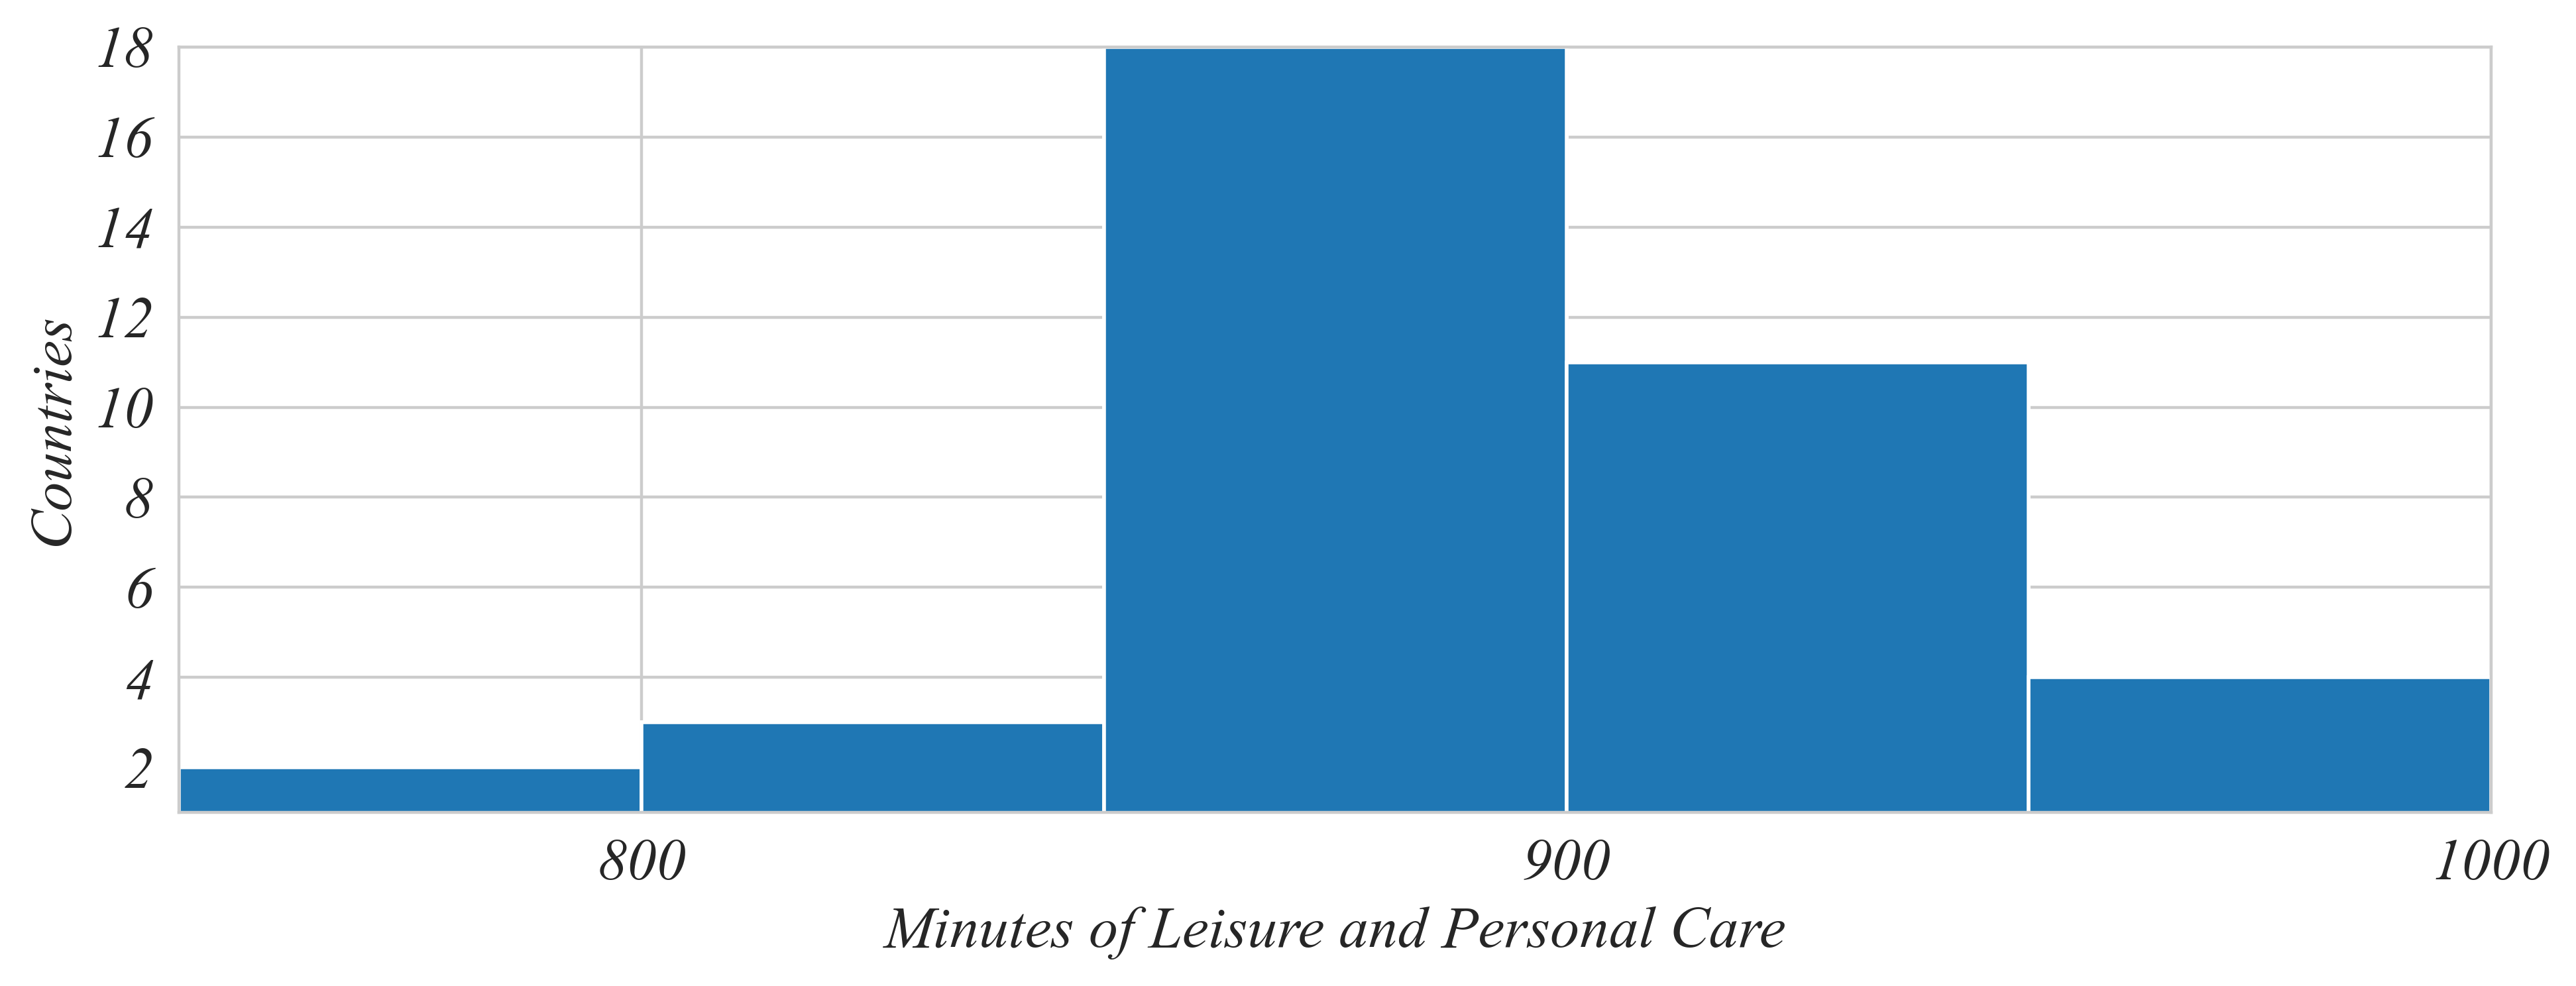

In [12]:
fig, axes = Weid_Fig(height=4, fontsize=16)

leisure = pd.read_csv('Data/HW1_Q1_Leisure_Time_OECD.csv')
leisure['Minutes'] = leisure['TIME']*60
plt.hist(
    leisure.Minutes, 
    bins=[750, 800, 850, 900, 950, 1000],
    color='blue'
)

max_freq = max(plt.hist(leisure.Minutes, bins=[750, 800, 850, 900, 950, 1000])[0])  # Get the maximum frequency

plt.yticks(range(2, int(max_freq) + 1,2))
plt.ylim(1,18)
plt.ylabel('Countries')

plt.xlim(750,1000)
plt.xticks([800, 900, 1000])
plt.xlabel('Minutes of Leisure and Personal Care')
plt.grid(True)

for spine in ax.spines.values():
    spine.set_edgecolor('white')
plt.tight_layout()

plt.savefig('i/HW1_Q1.png')

## Q2

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


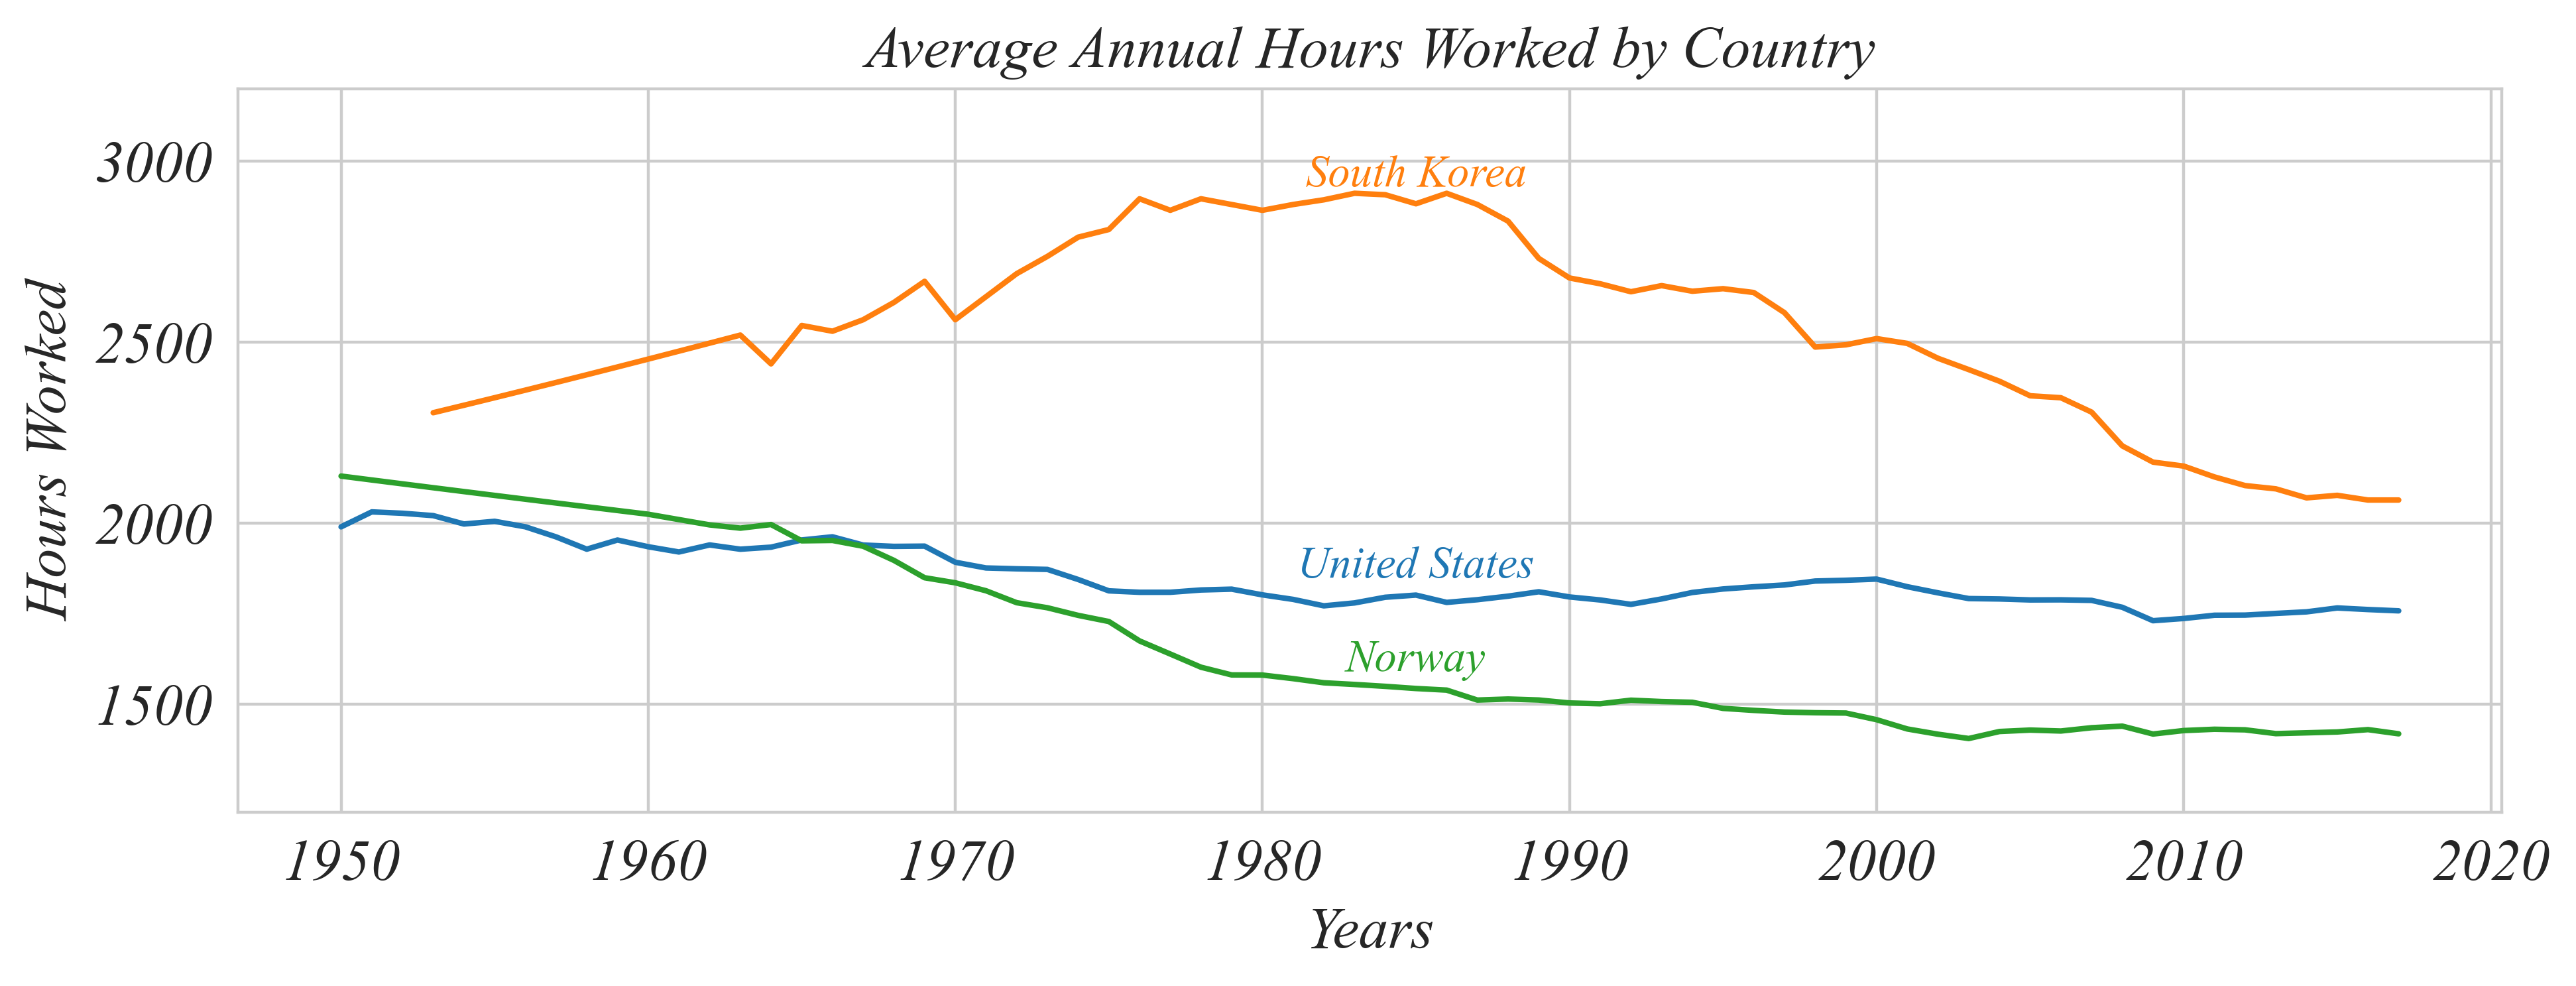

In [13]:
fig, axes = Weid_Fig(height=4, fontsize=16)

hours = pd.read_csv('Data/HW1_Q2_Annual_Working_Hours_full.csv')
hours.rename(columns={'Average annual working hours per worker': 'Hours'}, inplace=True)

for entity in ['United States', 'South Korea', 'Norway']:
    subhours = hours[hours.Entity == entity]
    subhours = subhours[subhours.Year >= 1950]
    line, = plt.plot(subhours.Year, subhours.Hours)

    line_color = line.get_color()

    year = 1985
    y_2015 = subhours[subhours.Year == year].Hours
    plt.annotate(
        entity,
        xy=(year, y_2015),  # Point to annotate
        xytext=(year, y_2015 + 50),  # Position of the text
        fontsize=12,
        ha='center',
        color=line_color
    )

plt.ylabel('Hours Worked')
plt.ylim(1200, 3200)

plt.xlabel('Years')
plt.grid(True)

plt.title('Average Annual Hours Worked by Country')
plt.tight_layout()
plt.savefig('i/HW1_Q2.png')

# HW 3

In [121]:
rate_all = pd.read_csv('Data/Marriage_Rates_full.csv')
rate_all.rename(columns={'Crude marriage rate (per 1,000 inhabitants)':'Marriage Rate'}, inplace=True)
rate = rate_all#[rate_all.Year == 2016]
#rate

In [120]:
code = pd.read_csv('Data/Country_Code_Continents.csv')
code.rename(columns={'ISO (3)':'Code'}, inplace=True)
code.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas'], dtype=object)

In [217]:
country_rates.Continent.values[0]

'Africa'

In [236]:
rates = pd.merge(code, rate, on='Code')[['Continent', 'Country', 'Year', 'Marriage Rate']]
rates.Continent.unique()

rate_list = []
for country in rates.Country.unique():
    country_rates = rates[rates.Country == country]
    recent_year = country_rates.Year.max()
    if recent_year > 1900:
        african_countries = ['Algeria', 'Angola', 
               'Djibouti', 'Egypt', 'Equatorial Guinea', 'Ethiopia',
               'Equatorial Guinea', 'Mozambique',
               'Sao Tome and Principe', 'Guinea-Bissau', 'Equatorial Guinea']
        if country_rates.Continent.values[0] != 'Africa' or country in african_countries:
            rate_list.append(country_rates[country_rates.Year == recent_year])
recent_rate = pd.concat(rate_list)

#recent_rate = recent_rate[recent_rate.Country.isin(african_countries)]
#recent_rate = recent_rate.sample(int(len(recent_rate)/3))
recent_rate.Continent.unique()
recent_rate[['Continent', 'Country', 'Marriage Rate']].to_csv('Data/Marriage_Rates.csv')

In [237]:
recent_rate[(recent_rate.Continent == 'Africa')]

,Continent,Country,Year,Marriage Rate
57,Africa,Algeria,2007,9.6
73,Africa,Angola,1970,4.3
850,Africa,Djibouti,1999,5.4
869,Africa,Egypt,2006,7.2
875,Africa,Equatorial Guinea,1966,0.8
934,Africa,Ethiopia,1999,9.3
1201,Africa,Guinea-Bissau,1971,0.2
2045,Africa,Mozambique,1970,1.0
2435,Africa,Sao Tome and Principe,1988,0.4


In [226]:
recent_rate[(recent_rate.Continent == 'Africa') & (recent_rate['Marriage Rate'] < 2)]

,Continent,Country,Year,Marriage Rate
875,Africa,Equatorial Guinea,1966,0.8
1201,Africa,Guinea-Bissau,1971,0.2
2045,Africa,Mozambique,1970,1.0
2435,Africa,Sao Tome and Principe,1988,0.4


In [234]:
recent_rate[(recent_rate['Marriage Rate'] > 20) | (recent_rate['Marriage Rate'] < 1)]

,Continent,Country,Year,Marriage Rate
80,Americas,Antigua and Barbuda,1995,21.000000
556,Oceania,Cook Islands,2007,59.000000
875,Africa,Equatorial Guinea,1966,0.800000
1201,Africa,Guinea-Bissau,1971,0.200000
2268,Oceania,Pitcairn Islands,1992,37.000000
2435,Africa,Sao Tome and Principe,1988,0.400000
3007,Americas,Virgin Islands,1993,34.200001
3016,Asia,Yemen,2002,0.600000


In [229]:
recent_rate[(recent_rate.Continent == 'Oceania') & (recent_rate['Marriage Rate'] > 10)]

,Continent,Country,Year,Marriage Rate
556,Oceania,Cook Islands,2007,59.0
2188,Oceania,Northern Mariana Islands,1989,17.4
2268,Oceania,Pitcairn Islands,1992,37.0


# HW 4
### Q3 Bikes and Weather

In [10]:
heath = pd.read_csv('Data/HW_04_Q1_Heathrow.txt', sep='\s+', engine='python')
heath.to_csv('Data/HW_04_Q1_Heathrow.csv')
heath.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1948,1,8.9,3.3,---,85.0,---
1,1948,2,7.9,2.2,---,26.0,---
2,1948,3,14.2,3.8,---,14.0,---
3,1948,4,15.4,5.1,---,35.0,---
4,1948,5,18.1,6.9,---,57.0,---


In [11]:
hires = pd.read_csv('Data/HW_04_Q1_Hires.csv')
hires.Hires = hires.Hires.str.replace(',', '').astype(int)
hires.head()

,Day,Hires
0,7/30/10,6897
1,7/31/10,5564
2,8/1/10,4303
3,8/2/10,6642
4,8/3/10,7966


In [12]:
import pandas as pd

# Load the hires dataset
hires = pd.read_csv('Data/HW_04_Q1_Hires.csv')

# Example of cleaning up a column (if needed) - assuming 'Hires' is a column with commas
hires['Hires'] = hires['Hires'].str.replace(',', '').astype(int)

# Convert 'date_column' to datetime format (assuming there's a date column in your dataset)
# If there's no 'date_column' or different date format, adjust accordingly
hires['date_column'] = pd.to_datetime(hires['Day'], format='%m/%d/%y')

# Extract month and year into separate columns
hires['mm'] = hires['date_column'].dt.month
hires['yyyy'] = hires['date_column'].dt.year

# Group by month and year
grouped_hires = hires.groupby(['mm', 'yyyy']).agg({'Hires': 'sum'}).reset_index()

# Load the heath dataset
heath = pd.read_csv('Data/HW_04_Q1_Heathrow.csv', index_col=False)

merged_df = pd.merge(grouped_hires, heath, on=['mm', 'yyyy'], how='inner')
merged_df['sun'] = merged_df['sun'].replace(r'[^\d.]', '', regex=True)
merged_df['sun'] = pd.to_numeric(merged_df['sun'], errors='coerce')  # Convert to numeric, setting errors='coerce' will turn invalid parsing into NaN

merged_df.to_csv('Data/HW_04_Q1_Bike_Weather.csv')

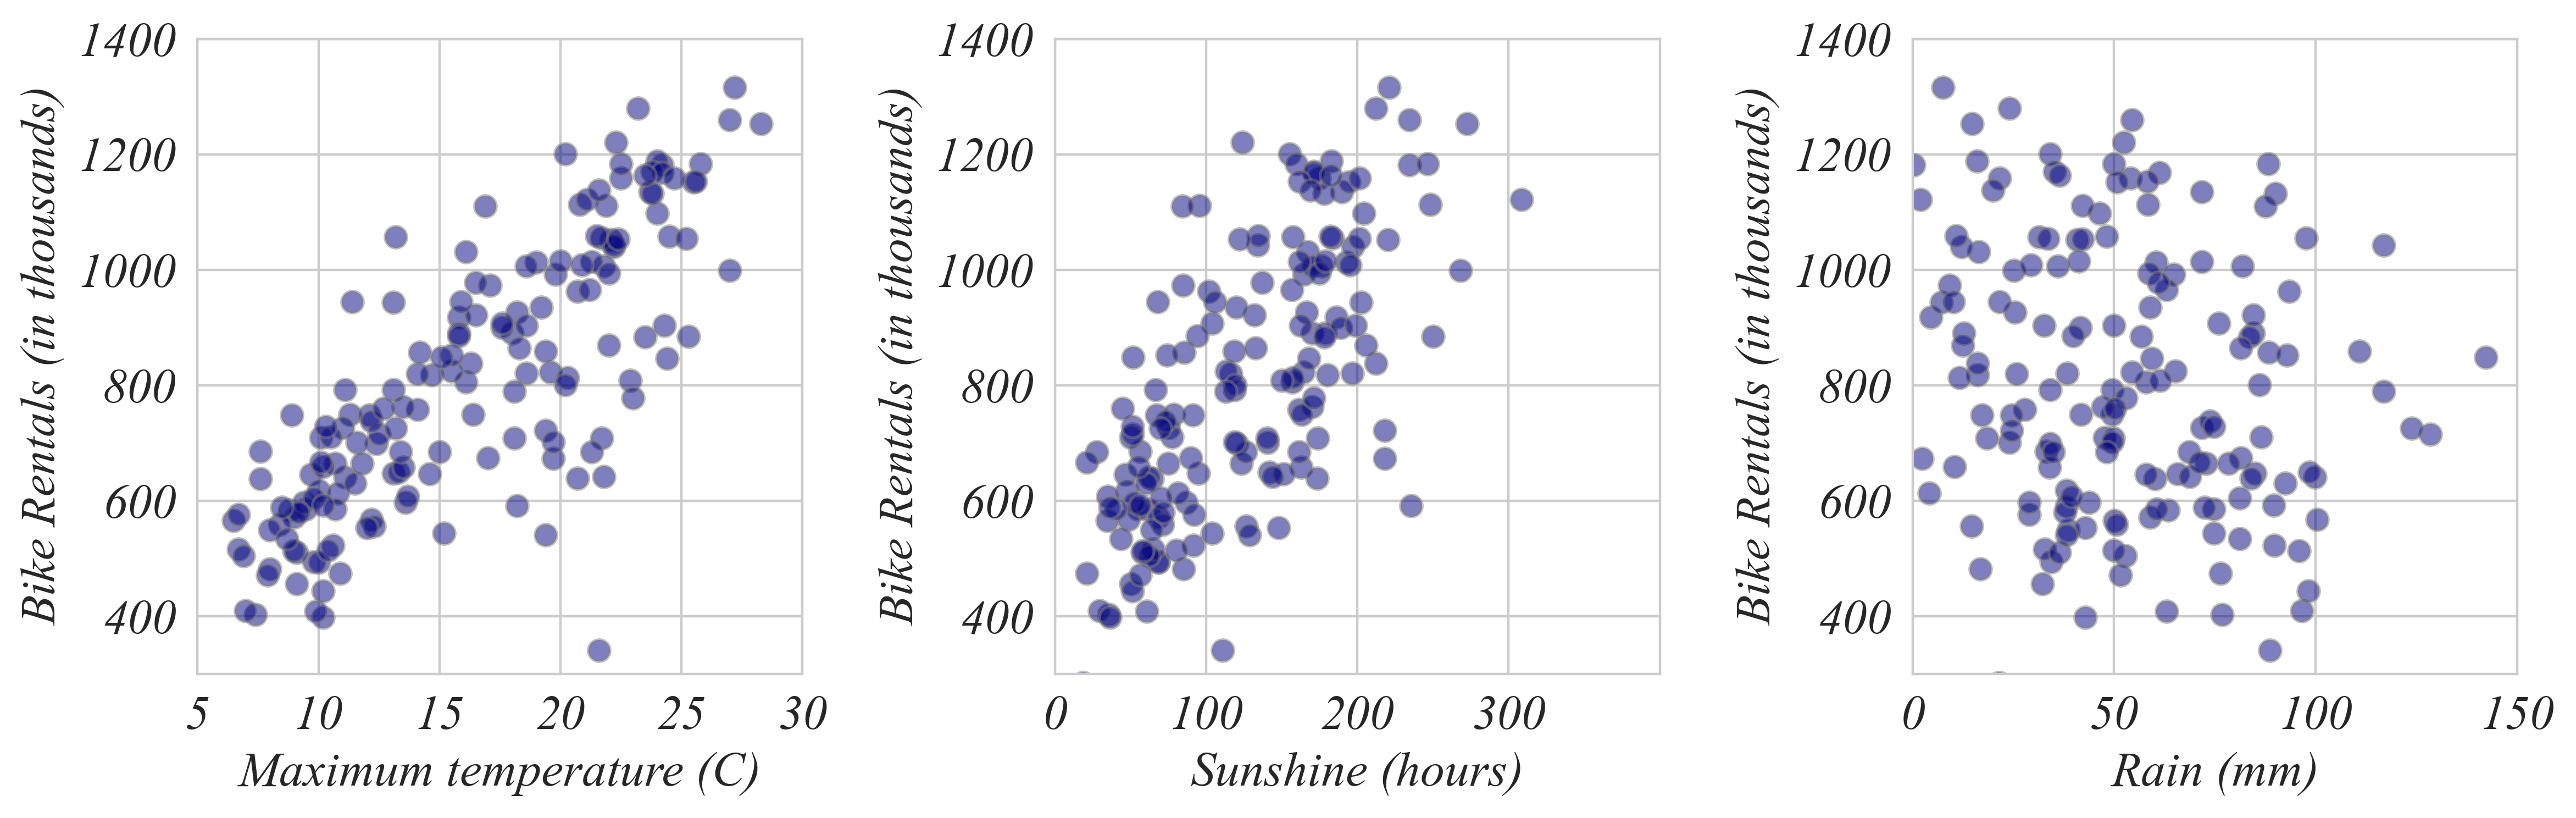

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'font.style': 'italic',
})

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=400, gridspec_kw={'width_ratios': [1,1, 1]})

# Adjust the space around the subplots
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

# Plot on the middle subplot
ax = axs[0]  # Middle subplot

data = pd.read_csv('Data/HW_04_Q1_Bike_Weather.csv')

ax.scatter(data['tmax'], data['Hires']/1000, color='navy', edgecolors='grey', alpha=0.5, s=50)

ax.set_xlabel('Maximum temperature (C)')
ax.set_xticks([5,10,15,20,25,30])
ax.set_xlim(5,30)
ax.set_ylabel('Bike Rentals (in thousands)')
ax.set_yticks([400,600,800,1000,1200,1400])
ax.set_ylim(300,1400)

# Plot on the middle subplot
ax = axs[1]  # Middle subplot

data = pd.read_csv('Data/HW_04_Q1_Bike_Weather.csv')

ax.scatter(data['sun'], data['Hires']/1000, color='navy', edgecolors='grey', alpha=0.5, s=50)

ax.set_xlabel('Sunshine (hours)')
ax.set_xticks([0,100,200,300])
ax.set_xlim(0,400)
ax.set_ylabel('Bike Rentals (in thousands)')
ax.set_yticks([400,600,800,1000,1200,1400])
ax.set_ylim(300,1400)

# Plot on the middle subplot
ax = axs[2]  # Middle subplot

data = pd.read_csv('Data/HW_04_Q1_Bike_Weather.csv')

ax.scatter(data['rain'], data['Hires']/1000, color='navy', edgecolors='grey', alpha=0.5, s=50)

ax.set_xlabel('Rain (mm)')
ax.set_xticks([0,50,100,150])
ax.set_xlim(0,150)
ax.set_ylabel('Bike Rentals (in thousands)')
ax.set_yticks([400,600,800,1000,1200,1400])
ax.set_ylim(300,1400)

plt.tight_layout()
plt.savefig('i/HW2_Q2.png', bbox_inches='tight')